In [118]:
#FINANCE Project
#DANDI CHEN, Qingzi Zeng, Kachi Ugo

#import
from pandas import Series, DataFrame
import pandas as pd
import re
from datetime import datetime
import copy
import  matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [119]:
#import data
Bonds_f = pd.read_csv('Foreign_Bond.csv')
ETF_f = pd.read_csv('Foreign_ETF.csv')
ETF_US = pd.read_csv('US_ETF.csv')
Bonds_US = pd.read_csv('US_bonds.csv')
Gold = pd.read_csv('Gold.csv')

# Part I

#### Foreign bonds annualized return, standard deviation and sharpe ratio and max drawdown

In [120]:
bond_f = Bonds_f
bond_f['date'] = pd.to_datetime(bond_f['caldt'],format='%Y%m%d')
bond_f['year'] = bond_f['date'].dt.to_period('Y').astype(str)
#get return +1 so that the prod() function can be used 
bond_f['return'] = bond_f['dret']+1
annualret_bond_f = bond_f.groupby(['year'])[['return']].prod()
annualret_bond_f['return']= annualret_bond_f['return'] - 1
annualret_bond_f=annualret_bond_f[1:]
#averaged annualized return
foreign_bondf_avg_ret = ((annualret_bond_f['return']+1).prod())**0.1-1
foreign_bondf_std_ret = annualret_bond_f['return'].std()
#results
print 'foreign bonds annualized return average', foreign_bondf_avg_ret
print 'foreign bonds annualized return average', foreign_bondf_std_ret
print 'foreign bonds annualized sharpe ratio', foreign_bondf_avg_ret/foreign_bondf_std_ret


foreign bonds annualized return average 0.07249459276310266
foreign bonds annualized return average 0.10344729268496909
foreign bonds annualized sharpe ratio 0.7007877236949299


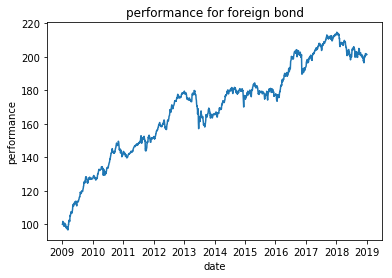

In [138]:
#max drawdown
bond_f1 = bond_f[['date','return']]
bond_f1= bond_f1.set_index('date')
bond_f1['cmlt_return'] = bond_f1['return']
bond_f1['cmlt_return'].fillna(1)

for i in range(1,len(bond_f1)):
    bond_f1['cmlt_return'][i] = bond_f1['cmlt_return'][i-1]*bond_f1['cmlt_return'][i]

bond_f1['cmlt_return']=  bond_f1['cmlt_return']*100
plot(bond_f1[1:]['cmlt_return'])
xlabel('date')
ylabel('performance')
title('performance for foreign bond')
show()


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


#### Foreign ETF annualized return, annualized return standard deviation, sharpe ratio and max drawdown

In [122]:
etf_f = ETF_f
etf_f['date'] = pd.to_datetime(etf_f['caldt'],format='%Y%m%d')
etf_f['year'] = etf_f['date'].dt.to_period('Y').astype(str)
#get return +1 so that the prod() function can be used 
etf_f['return'] = etf_f['dret']+1
annualret_etf_f = etf_f.groupby(['year'])[['return']].prod()
annualret_etf_f['return']= annualret_etf_f['return'] - 1
annualret_etf_f=annualret_etf_f[1:]
#averaged annualized return
foreign_etff_avg_ret = ((annualret_etf_f['return']+1).prod())**0.1-1
foreign_etff_std_ret = annualret_etf_f['return'].std()
#results
print 'foreign bonds annualized return average', foreign_etff_avg_ret
print 'foreign bonds annualized return average', foreign_etff_std_ret
print 'foreign bonds annualized sharpe ratio', foreign_etff_avg_ret/foreign_etff_std_ret

foreign bonds annualized return average 0.05770263399510167
foreign bonds annualized return average 0.3142212322624955
foreign bonds annualized sharpe ratio 0.18363696679445835


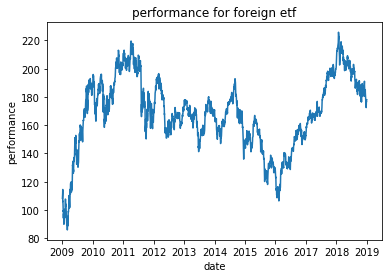

In [123]:
#max drawdown
etf_f1 = etf_f[['date','return']]
etf_f1= etf_f1.set_index('date')
etf_f1['cmlt_return'] = etf_f1['return']
etf_f1['cmlt_return'].fillna(1)

for i in range(1,len(etf_f1)):
    etf_f1['cmlt_return'][i] = etf_f1['cmlt_return'][i-1]*etf_f1['cmlt_return'][i]

etf_f1['cmlt_return']=  etf_f1['cmlt_return']*100
plot(etf_f1[1:]['cmlt_return'])
xlabel('date')
ylabel('performance')
title('performance for foreign etf')
show()


#### US ETF annualized return, standard deviation, sharpe ratio and max drawdown

In [124]:
etf_us = ETF_US
etf_us['date'] = pd.to_datetime(etf_us['caldt'],format='%Y%m%d')
etf_us['year'] = etf_us['date'].dt.to_period('Y').astype(str)
#get return +1 so that the prod() function can be used 
etf_us['return'] = etf_us['dret']+1
annualret_etf_us = etf_us.groupby(['year'])[['return']].prod()
annualret_etf_us['return']= annualret_etf_us['return'] - 1
annualret_etf_us=annualret_etf_us[1:]
#averaged annualized return
foreign_etfus_avg_ret = ((annualret_etf_us['return']+1).prod())**0.1-1
foreign_etfus_std_ret = annualret_etf_us['return'].std()
#results
print 'foreign bonds annualized return average', foreign_etfus_avg_ret
print 'foreign bonds annualized return average', foreign_etfus_std_ret
print 'foreign bonds annualized sharpe ratio', foreign_etfus_avg_ret/foreign_etfus_std_ret

foreign bonds annualized return average 0.12431683049046072
foreign bonds annualized return average 0.08876355202970569
foreign bonds annualized sharpe ratio 1.4005391587850915


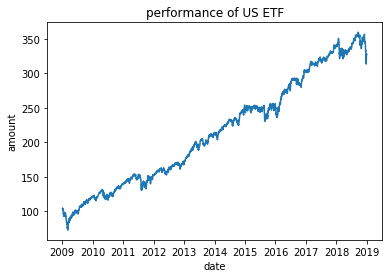

In [125]:
#max drawdown
etf_us1 = etf_us[['date','return']]
etf_us1= etf_us1.set_index('date')
etf_us1['cmlt_return'] = etf_us1['return']
etf_us1['cmlt_return'].fillna(1)

for i in range(1,len(etf_us1)):
    etf_us1['cmlt_return'][i] = etf_us1['cmlt_return'][i-1]*etf_us1['cmlt_return'][i]

etf_us1['cmlt_return']=  etf_us1['cmlt_return']*100
plot(etf_us1[1:]['cmlt_return'])
xlabel('date')
ylabel('amount')
title('performance of US ETF')
show()



#### US bond annualized return, standard deviation, sharpe ratio and max drawdown

In [126]:
bond_us = Bonds_US
bond_us['date'] = pd.to_datetime(bond_us['caldt'],format='%Y%m%d')
bond_us['year'] = bond_us['date'].dt.to_period('Y').astype(str)
#get return +1 so that the prod() function can be used 
bond_us['return'] = bond_us['dret']+1
annualret_bond_us = bond_us.groupby(['year'])[['return']].prod()
annualret_bond_us['return']= annualret_bond_us['return'] - 1
annualret_bond_us=annualret_bond_us[1:]
#averaged annualized return
foreign_bondus_avg_ret = ((annualret_bond_us['return']+1).prod())**0.1-1
foreign_bondus_std_ret = annualret_bond_us['return'].std()
#results
print 'foreign bonds annualized return average', foreign_bondus_avg_ret
print 'foreign bonds annualized return average', foreign_bondus_std_ret
print 'foreign bonds annualized sharpe ratio', foreign_bondus_avg_ret/foreign_bondus_std_ret


foreign bonds annualized return average 0.048488109996344786
foreign bonds annualized return average 0.054299990867836455
foreign bonds annualized sharpe ratio 0.8929671851025259


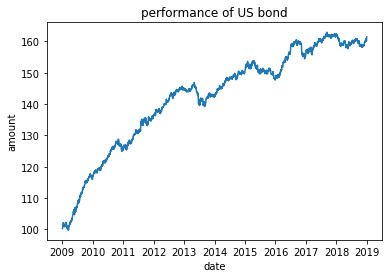

In [127]:
bond_us1 = bond_us[['date','return']]
bond_us1= bond_us1.set_index('date')
bond_us1['cmlt_return'] = bond_us1['return']
bond_us1['cmlt_return'].fillna(1)

for i in range(1,len(bond_us1)):
    bond_us1['cmlt_return'][i] = bond_us1['cmlt_return'][i-1]*bond_us1['cmlt_return'][i]

bond_us1['cmlt_return']=  bond_us1['cmlt_return']*100
plot(bond_us1[1:]['cmlt_return'])
xlabel('date')
ylabel('amount')
title('performance of US bond')
show()


#### Gold annualized return, standard deviation, sharpe ratio and max drawdown

In [128]:
Gold = Gold
Gold['date'] = pd.to_datetime(Gold['caldt'],format='%Y%m%d')
Gold['year'] = Gold['date'].dt.to_period('Y').astype(str)
#get return +1 so that the prod() function can be used 
Gold['return'] = Gold['dret']+1
annualret_Gold = Gold.groupby(['year'])[['return']].prod()
annualret_Gold['return']= annualret_Gold['return'] - 1
annualret_Gold=annualret_Gold[1:]
#averaged annualized return
foreign_Gold_avg_ret = ((annualret_Gold['return']+1).prod())**0.1-1
foreign_Gold_std_ret = annualret_Gold['return'].std()
#results
print 'foreign Golds annualized return average', foreign_Gold_avg_ret
print 'foreign Golds annualized return average', foreign_Gold_std_ret
print 'foreign Golds annualized sharpe ratio', foreign_Gold_avg_ret/foreign_Gold_std_ret

foreign Golds annualized return average 0.03596297867551068
foreign Golds annualized return average 0.16761341200498267
foreign Golds annualized sharpe ratio 0.21455907522747406


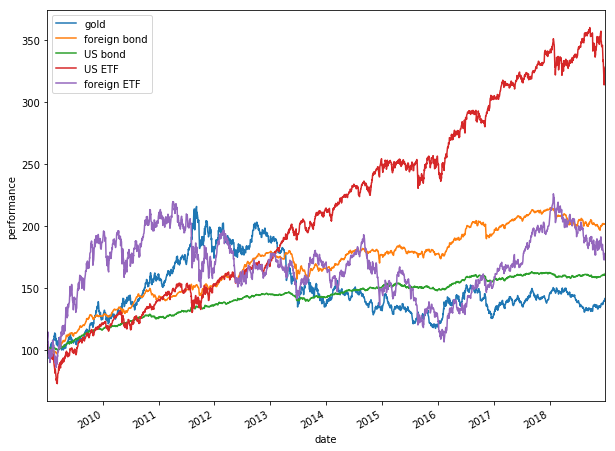

In [164]:
gold11 = Gold[['date','return']]
gold11= gold11.set_index('date')

# #graph
gold11['cmlt_return'] = gold11['return']
gold11['cmlt_return'].fillna(1)

for i in range(1,len(gold11)):
    gold11['cmlt_return'][i] = gold11['cmlt_return'][i-1]*gold11['cmlt_return'][i]

gold11['cmlt_return']=  gold11['cmlt_return']*100
# plot(gold11[1:]['cmlt_return'],bond_f1[1:]['cmlt_return'],bond_us1[1:]['cmlt_return'],\
#     etf_us1[1:]['cmlt_return'],etf_f1[1:]['cmlt_return'])
# xlabel('date')
# ylabel('performance')
# title('performance for gold')
# show()

fig= plt.figure(figsize=(10,8))
gold11[1:]['cmlt_return'].plot(label='gold')
bond_f1[1:]['cmlt_return'].plot(label='foreign bond')
bond_us1[1:]['cmlt_return'].plot(label='US bond')
etf_us1[1:]['cmlt_return'].plot(label='US ETF')
etf_f1[1:]['cmlt_return'].plot(label='foreign ETF')


#show graph
ylabel('performance')
legend(loc='best')
show()

# part II

#### with weights

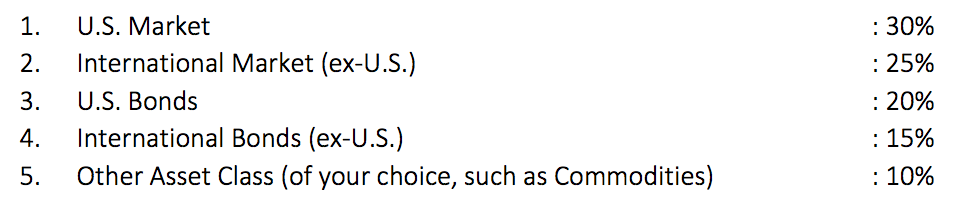

In [227]:
agg_gw = pd.DataFrame(gold11.index)
#weights
USM = 3
IM = 2.5
USB = 2
IB = 1.5
OAC = 1
agg_gw = agg_gw.set_index('date')

#start constructing aggregate portfolio return given, investing $1000 initially
agg_gw['USM'] = etf_us1['cmlt_return']*USM
agg_gw['USM growth'] = etf_us1['return']
agg_gw['IM'] = etf_f1['cmlt_return']*IM
agg_gw['IM growth'] = etf_f1['return']
agg_gw['USB'] = bond_us1['cmlt_return']*USB
agg_gw['USB growth'] = bond_us1['return']
agg_gw['IB'] = bond_f1['cmlt_return']*IB
agg_gw['IB growth'] = bond_f1['return']
agg_gw['OAC'] = gold11['cmlt_return']*OAC
agg_gw['OAC growth'] = gold11['return']
agg_gw['Total'] =  agg_gw['USM'] + agg_gw['IM'] + agg_gw['USB'] + agg_gw['IB'] + agg_gw['OAC']
agg_gw['month'] = agg_gw.index.to_period('M').astype(str)
agg_gw['balanced'] = agg_gw['Total']
agg_gw
lastmonth = 0
for i in range(1,len(agg_gw)):
    month = agg_gw['month'][i]
    if lastmonth == month:
        agg_gw['USM'][i] = agg_gw['USM'][i-1]*agg_gw['USM growth'][i]
        agg_gw['IM'][i] = agg_gw['IM'][i-1]*agg_gw['IM growth'][i]
        agg_gw['USB'][i] = agg_gw['USB'][i-1]*agg_gw['USB growth'][i]
        agg_gw['IB'][i] = agg_gw['IB'][i-1]*agg_gw['IB growth'][i]
        agg_gw['OAC'][i] = agg_gw['OAC'][i-1]*agg_gw['OAC growth'][i]
        agg_gw['balanced'][i] = agg_gw['USM'][i] + agg_gw['IM'][i] + agg_gw['USB'][i]\
                                + agg_gw['IB'][i] + agg_gw['OAC'][i]
        lastmonth=month
    else:
        #get the weight and recalculate the first day of the month number 
        agg_gw['USM'][i] = agg_gw['Total'][i-1]*0.3*agg_gw['USM growth'][i]
        agg_gw['IM'][i] = agg_gw['Total'][i-1]*0.25*agg_gw['IM growth'][i]
        agg_gw['USB'][i] = agg_gw['Total'][i-1]*0.2*agg_gw['USB growth'][i]
        agg_gw['IB'][i] = agg_gw['Total'][i-1]*0.15*agg_gw['IB growth'][i]
        agg_gw['OAC'][i] = agg_gw['Total'][i-1]*0.1*agg_gw['OAC growth'][i]
        agg_gw['balanced'][i] = agg_gw['USM'][i] + agg_gw['IM'][i] + agg_gw['USB'][i]\
                                + agg_gw['IB'][i] + agg_gw['OAC'][i]
        lastmonth = month
 #agg_gw['balanced'][2:]  =  agg_gw['balanced'][2:]/10     
    

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/

In [221]:
#get return from balanced
agg_gw['year'] = agg_gw.index.to_period('Y').astype(str)
agg_gw['return_balanced'] = agg_gw['balanced'].shift(1).fillna(1)
agg_gw['return_balanced'] = agg_gw['balanced'] / agg_gw['return_balanced']
agg_gw['return_balanced'][0:1] = agg_gw['balanced'][0:1]/1000
agg_annual_return =agg_gw.groupby(['year'])[['return_balanced']].prod()
agg_annual_return['return']= agg_annual_return['return_balanced'] - 1
#calcualte annualized return for the portfolio
port1_ann_return= ((agg_annual_return['return']+1).prod())**0.1-1
port1_ann_return_std = agg_annual_return['return'].std()
#results
print 'Portfolio annualized return average', port1_ann_return
print 'Portfolio annualized return standard deviation', port1_ann_return_std
print 'Portfolio annualized sharpe ratio', port1_ann_return/port1_ann_return_std

Portfolio annualized return average -0.14069596414648655
Portfolio annualized return standard deviation 0.3128976345714657
Portfolio annualized sharpe ratio -0.44965493056276734


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


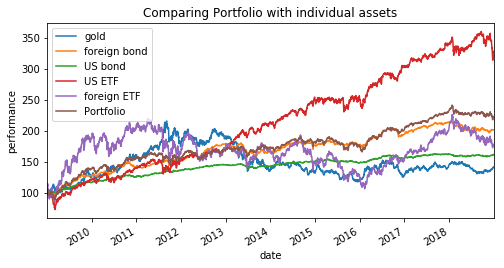

date
2008-12-31    1009.256250
2009-01-02    1033.477290
2009-01-05    1038.842324
2009-01-06    1051.192203
2009-01-07    1023.265391
2009-01-08    1025.368003
2009-01-09    1015.651720
2009-01-12     993.551346
2009-01-13     994.302059
2009-01-14     971.229959
2009-01-15     975.398529
2009-01-16     984.692206
2009-01-20     953.552985
2009-01-21     974.363400
2009-01-22     960.599645
2009-01-23     965.836710
2009-01-26     973.938119
2009-01-27     981.877437
2009-01-28    1003.299450
2009-01-29     981.451588
2009-01-30     976.942454
2009-02-02     974.627898
2009-02-03     981.423531
2009-02-04     983.998485
2009-02-05     995.811115
2009-02-06    1018.336379
2009-02-09    1016.594644
2009-02-10     991.149822
2009-02-11     998.415399
2009-02-12     996.681969
                 ...     
2018-11-15    2262.072850
2018-11-16    2270.112117
2018-11-19    2263.726233
2018-11-20    2237.959753
2018-11-21    2248.634182
2018-11-23    2239.430735
2018-11-26    2244.776407
2018-11

In [230]:
fig= plt.figure(figsize=(8,4))
gold11[1:]['cmlt_return'].plot(label='gold')
bond_f1[1:]['cmlt_return'].plot(label='foreign bond')
bond_us1[1:]['cmlt_return'].plot(label='US bond')
etf_us1[1:]['cmlt_return'].plot(label='US ETF')
etf_f1[1:]['cmlt_return'].plot(label='foreign ETF')
(agg_gw[1:]['balanced']/10).plot(label = 'Portfolio')

#show graph
ylabel('performance')
legend(loc='best')
title('Comparing Portfolio with individual assets')
show()
agg_gw['balanced']